<a href="https://colab.research.google.com/github/Jagadishchandra17/Data-Analaytics-AI-ML-/blob/main/Heart_attack_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Heart Attack Risk Prediction**

In [ ]:
# Heart Attack risk prediction

# Loading the Data set


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
# loading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart_attack_risk_dataset.csv to heart_attack_risk_dataset.csv


In [ ]:
df = pd.read_csv('heart_attack_risk_dataset.csv')

# Inspecting the data

In [ ]:
df.shape

(50000, 20)

In [ ]:
df.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate


In [ ]:
## from the data , we can see that Heart_Attack_Risk is the target variable.

In [ ]:
df.tail()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
49995,21,Male,0,0,Low,39.93,0,0,269.9,171,113,0,High,Typical,Reversible defect,0,ST-T abnormality,0,122,High
49996,35,Female,0,0,Low,18.10,0,0,235.8,146,71,0,Moderate,Non-anginal,Fixed defect,1,ST-T abnormality,0,121,Moderate
49997,46,Male,0,1,High,21.42,0,0,172.8,146,85,1,Low,Typical,Fixed defect,0,Left Ventricular Hypertrophy,0,125,Low
49998,56,Male,0,1,Low,29.93,0,0,244.1,151,110,0,Low,Asymptomatic,Reversible defect,0,Normal,0,149,Moderate
49999,72,Male,0,0,High,30.85,0,0,191.8,142,70,0,High,Asymptomatic,Normal,0,ST-T abnormality,0,144,Moderate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  int64  
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  object 
 13  Chest_Pain_Type          50000 non-null  object 
 14  Thalassemia           

In [ ]:
df.describe()

,Age,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Fasting_Blood_Sugar,Exercise_Induced_Angina,Max_Heart_Rate_Achieved
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,53.398700,0.298420,0.401980,27.519357,0.198840,0.29738,225.036444,134.434100,94.530480,0.30034,0.149360,0.201640,149.305340
std,20.799006,0.457569,0.490303,7.225176,0.399131,0.45711,43.317373,25.907961,20.187124,0.45841,0.356447,0.401229,28.823699
min,18.000000,0.000000,0.000000,15.000000,0.000000,0.00000,150.000000,90.000000,60.000000,0.00000,0.000000,0.000000,100.000000
25%,35.000000,0.000000,0.000000,21.270000,0.000000,0.00000,187.300000,112.000000,77.000000,0.00000,0.000000,0.000000,124.000000
50%,53.000000,0.000000,0.000000,27.540000,0.000000,0.00000,225.100000,134.000000,94.000000,0.00000,0.000000,0.000000,149.000000
75%,71.000000,1.000000,1.000000,33.770000,0.000000,1.00000,262.600000,157.000000,112.000000,1.00000,0.000000,0.000000,174.000000
max,89.000000,1.000000,1.000000,40.000000,1.000000,1.00000,300.000000,179.000000,129.000000,1.00000,1.000000,1.000000,199.000000


In [ ]:
df.isnull().sum() # no null values

,0
Age,0
Gender,0
Smoking,0
Alcohol_Consumption,0
Physical_Activity_Level,0
BMI,0
Diabetes,0
Hypertension,0
Cholesterol_Level,0
Resting_BP,0


In [ ]:
num_duplicates = df.duplicated().sum()
print(num_duplicates)

0


# Exploratory Data Analysis

In [ ]:
 ## Target variable is categoried as Low, Moderate and High. mapping them into numeric values


In [ ]:
df.Heart_Attack_Risk = df.Heart_Attack_Risk.map({'Low':1,'Moderate':2,'High':3})

In [ ]:
df.head(5)

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,1
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,2
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,1
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,1
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,2


In [ ]:
## Now comparing the other features with the target variable.

<ipython-input-21-a918dad73f42>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.index, y=correlation.values, palette='viridis')


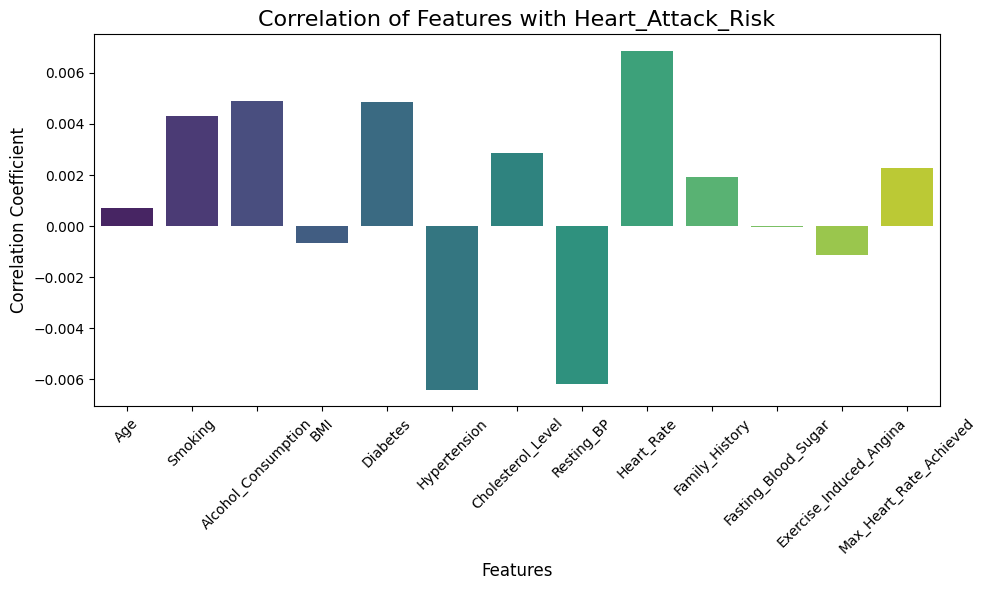

In [ ]:
columns = ['Age', 'Smoking', 'Alcohol_Consumption', 'BMI', 'Diabetes', 'Hypertension',
           'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History',
           'Fasting_Blood_Sugar', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved']

# Compute correlation with the target variable
correlation = df[columns + ['Heart_Attack_Risk']].corr()['Heart_Attack_Risk'].drop('Heart_Attack_Risk')

# Plot correlation using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Correlation of Features with Heart_Attack_Risk', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
df.Gender = df.Gender.map({'Male':1,'Female':2})
df.Physical_Activity_Level = df.Physical_Activity_Level.map({'Low':1,'Moderate':2,'High':3})
df.Stress_Level = df.Stress_Level.map({'Low':1,'Moderate':2,'High':3})
df.Chest_Pain_Type = df.Chest_Pain_Type.map({'Typical':1,'Atypical':2,'Non-anginal':3,'Asymptomatic':4})
df.Thalassemia = df.Thalassemia.map({'Normal':1,'Fixed defect':2,'Reversible defect':3})
df.ECG_Results = df.ECG_Results.map({'Normal':1,'ST-T abnormality':2,'Left Ventricular Hypertrophy':3})

In [ ]:
df.head(5)

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,2,1,0,2,34.61,1,0,152.1,171,85,0,2,3,3,0,1,0,114,1
1,32,1,0,0,2,22.75,0,0,166.8,126,103,0,1,4,1,0,2,0,173,2
2,89,1,0,1,2,35.32,0,0,272.3,123,127,0,1,1,3,0,2,0,109,1
3,78,1,0,1,2,18.23,1,0,237.7,144,125,0,1,1,2,1,3,0,129,1
4,38,2,1,0,2,19.82,0,0,207.7,123,107,0,3,4,3,0,2,0,124,2


<ipython-input-33-15609a3f5ec2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smoking_status_count.index, y=smoking_status_count.values, palette=['#FF9999', '#FF6666'])


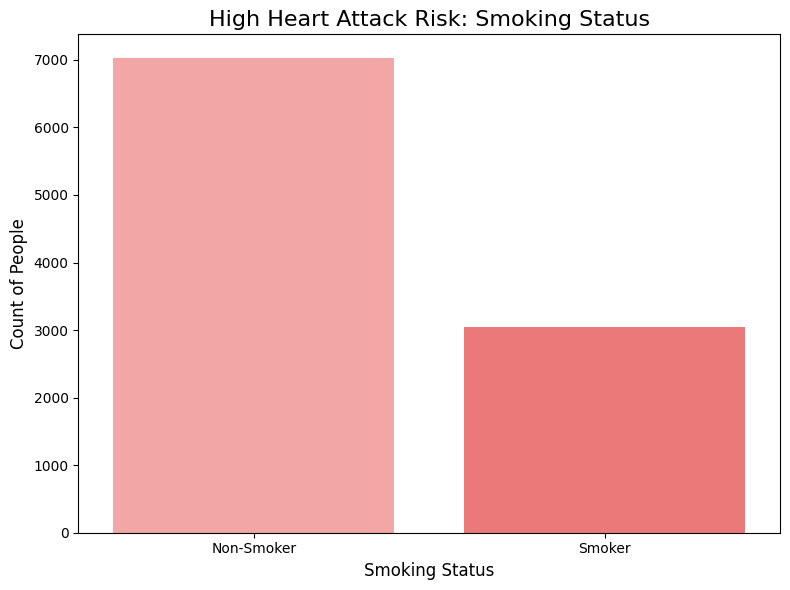

<ipython-input-33-15609a3f5ec2>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=alcohol_consumption_status_count.index, y=alcohol_consumption_status_count.values, palette=['#66B3FF', '#3399FF'])


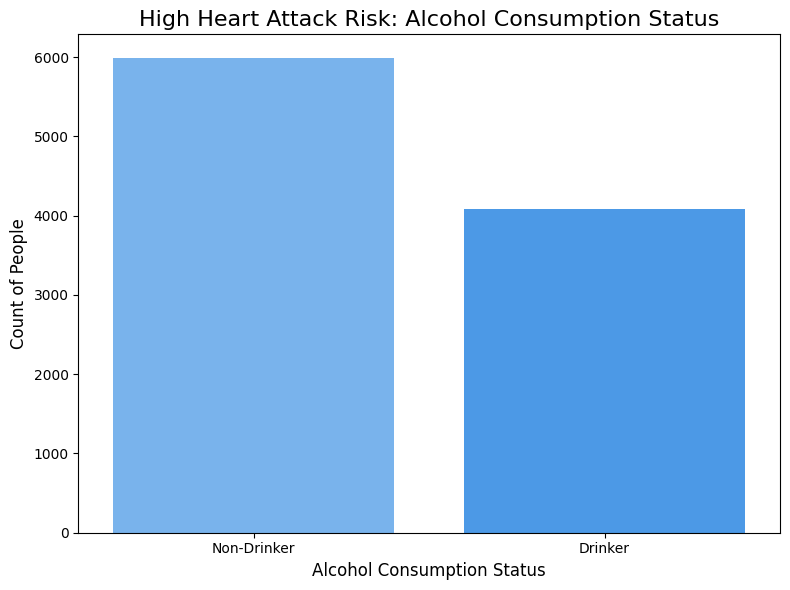

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset for high heart attack risk
high_risk_data = df[df['Heart_Attack_Risk'] == 3]

# Count the number of smokers and non-smokers with high heart attack risk
smoking_status_count = high_risk_data['Smoking'].value_counts()
alcohol_consumption_status_count = high_risk_data['Alcohol_Consumption'].value_counts()

# Map labels for better readability
smoking_status_count.index = ['Non-Smoker', 'Smoker']
alcohol_consumption_status_count.index = ['Non-Drinker', 'Drinker']

# Plot for Smoking Status
plt.figure(figsize=(8, 6))
sns.barplot(x=smoking_status_count.index, y=smoking_status_count.values, palette=['#FF9999', '#FF6666'])
plt.title('High Heart Attack Risk: Smoking Status', fontsize=16)
plt.xlabel('Smoking Status', fontsize=12)
plt.ylabel('Count of People', fontsize=12)
plt.tight_layout()
plt.show()

# Plot for Alcohol Consumption Status
plt.figure(figsize=(8, 6))
sns.barplot(x=alcohol_consumption_status_count.index, y=alcohol_consumption_status_count.values, palette=['#66B3FF', '#3399FF'])
plt.title('High Heart Attack Risk: Alcohol Consumption Status', fontsize=16)
plt.xlabel('Alcohol Consumption Status', fontsize=12)
plt.ylabel('Count of People', fontsize=12)
plt.tight_layout()
plt.show()


# Data Models

In [ ]:
# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Prepare data
X = df.drop('Heart_Attack_Risk', axis=1)  # Features
y = df['Heart_Attack_Risk']               # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.51      1.00      0.67      5083
           2       0.00      0.00      0.00      2930
           3       0.00      0.00      0.00      1987

    accuracy                           0.51     10000
   macro avg       0.17      0.33      0.22     10000
weighted avg       0.26      0.51      0.34     10000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.26
Recall: 0.51
F1-Score: 0.34


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# The precision, recall, and F1-scores for class 2 and class 3 are 0, meaning the model is unable to correctly classify any instances in these classes. Class 1 (low risk) dominates the predictions with 100% recall, suggesting the model is biased toward this class. The overall accuracy is 51%, which is misleading because the model predicts the majority class (class 1) most of the time, regardless of the input.

In [ ]:
# random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  confusion_matrix

# Initialize and train the Random Forest model with class balancing
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Classification Report:
              precision    recall  f1-score   support

           1       0.51      0.97      0.67      5083
           2       0.33      0.04      0.06      2930
           3       0.29      0.00      0.00      1987

    accuracy                           0.50     10000
   macro avg       0.38      0.34      0.25     10000
weighted avg       0.41      0.50      0.36     10000

Confusion Matrix:
[[4935  144    4]
 [2819  105    6]
 [1915   68    4]]
Precision: 0.41
Recall: 0.50
F1-Score: 0.36


In [ ]:
# model shows good recall for low-risk individuals (Class 1) but performs poorly for moderate (Class 2) and high-risk (Class 3) individuals, likely due to class imbalance. The model's precision and recall for Class 2 and Class 3 are very low, indicating it's struggling to correctly identify these classes. more advanced model can help a little more towards high risk people.

In [ ]:
# XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Remap the target variable to start from 0
y_mapped = y - 1  # Mapping 1 -> 0, 2 -> 1, 3 -> 2

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.51      0.89      0.65      5083
           1       0.29      0.10      0.15      2930
           2       0.18      0.02      0.03      1987

    accuracy                           0.48     10000
   macro avg       0.33      0.33      0.28     10000
weighted avg       0.38      0.48      0.38     10000



In [ ]:
# ecall for moderate (Class 1) and high-risk (Class 2) classes is very low (0.10 and 0.02), suggesting that the model is not effectively identifying these individuals, likely due to class imbalanc


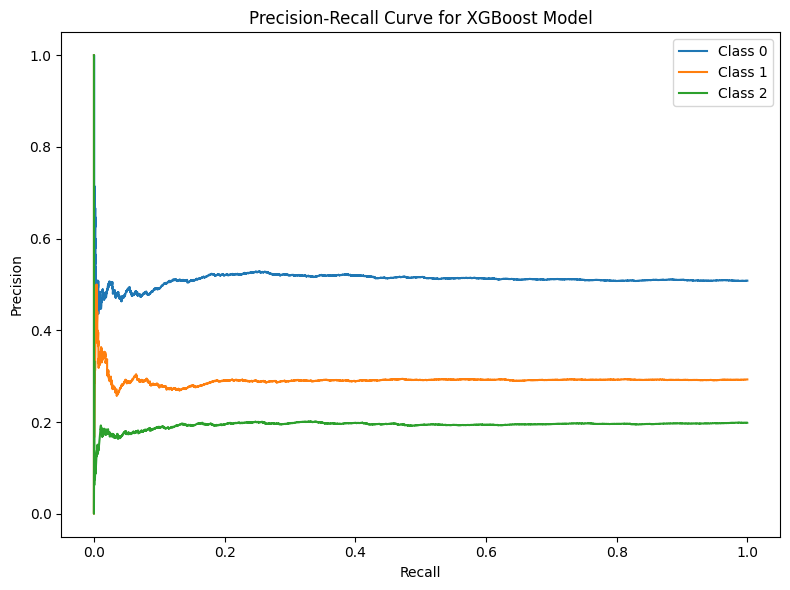

Average Precision Score for Class 0: 0.51
Average Precision Score for Class 1: 0.29
Average Precision Score for Class 2: 0.19


In [ ]:
# Predict probabilities for the test set
y_prob = xgb_model.predict_proba(X_test)

# Plot Precision-Recall curve for each class
plt.figure(figsize=(8, 6))

# For each class (0, 1, 2)
for i in range(len(xgb_model.classes_)):
    precision, recall, _ = precision_recall_curve(y_test == xgb_model.classes_[i], y_prob[:, i])
    plt.plot(recall, precision, label=f'Class {xgb_model.classes_[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost Model')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Calculate and print Average Precision Score for each class
for i in range(len(xgb_model.classes_)):
    average_precision = average_precision_score(y_test == xgb_model.classes_[i], y_prob[:, i])
    print(f'Average Precision Score for Class {xgb_model.classes_[i]}: {average_precision:.2f}')
